<a href="https://colab.research.google.com/github/CalebaR/MAT-421/blob/main/ModuleC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**19.1: Root Finding Problem Statement**\
The root of the a function is where y = 0 or f(x) = 0. A function may have 0 roots or many roots. Some function have roots that are very easy to find directly or with a formula. But many functions have roots that are not possible to find directly. There can be approximations with various methods

root = [-3.52047359e+83]
result= [0.]


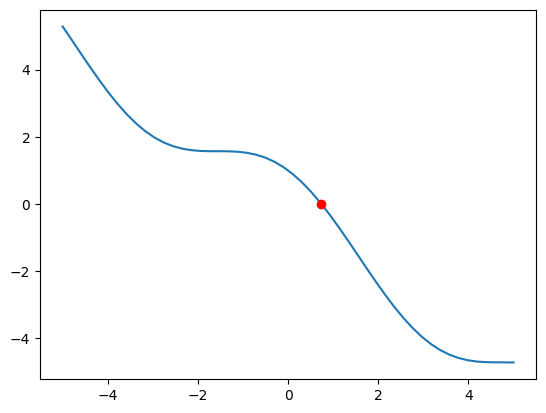

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize

# Finding the root of cos(x) - x

x = np.linspace(-5,5) #x values between -5 and 5
y = np.cos(x) - x #function y = cos(x) - x
plt.plot(x,y)

f = lambda x: np.cos(x) - x
root = optimize.fsolve(f, -2) #fsolve function finds the roots of non linear equations
print("root =", r)

# Verify the solution is a root
fRoot = f(root)
print("result=", fRoot)
plt.plot(root,0,'or'); #plotting the root

r = [-3.52047359e+83]
result= [-2.84052692e-84]


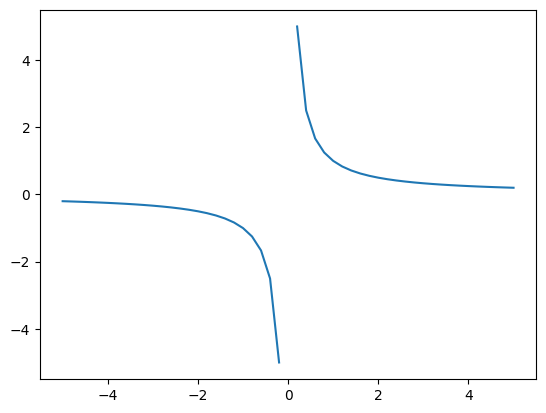

In [28]:
#Finding the root of 1/x

#plotting 1/x
x = np.linspace(-5,5,51) #x values between -5 and 5
def f(x):
    with np.errstate(divide='ignore', invalid='ignore'):
        return 1/x #function y = 1/x
y = f(x)
plt.plot(x,y); #the plot shows that 1/x = 0 has no solution.

f = lambda x: 1/x

root = optimize.fsolve(f, -2)
print("r =", root)

result = f(root) #we can see the root is incorrect
print("result=", result)

**19.2: Tolerance**\
Tolerance is the amount of error that is accepted. It is chosen by a person. For example, a thermometer manufacturer might have a tolerance of &plusmn; 2&deg;F for thermometers they sell. Tolerance for root finding can be straight foward. Since we know the root is when f(x) = 0, we want f(root) to be as close to zero as possible or f(root)&#8776;0.

**19.3: Bisection Method**

**19.4: Newton-Raphson Method**

**19.5: Root Finding in Python**